<a href="https://colab.research.google.com/github/Sikandarh11/CodeClause-Data-Science-Internship-/blob/main/Task_1_(KMeans_Clustering_on_Customer_Segment_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [23]:
dataset = pd.read_excel("/content/Online Retail.xlsx")

In [ ]:
dataset.sample(10)

In [ ]:
dataset.shape

In [27]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [63]:
df = dataset.drop(['CustomerID'], axis =1)

In [64]:
df.dropna(inplace = True)
df.isnull().sum(), df.shape

(InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 Country        0
 dtype: int64,
 (540455, 7))

In [65]:
df.duplicated().sum()

5268

In [66]:
df = df.drop_duplicates()
df.shape

(535187, 7)

# **Basic Questions**

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   Country      535187 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.7+ MB


In [68]:
column = dataset.columns
for col in column:
  print(col, " : ",dataset[col].unique().shape)

InvoiceNo  :  (25900,)
StockCode  :  (4070,)
Description  :  (4224,)
Quantity  :  (722,)
InvoiceDate  :  (23260,)
UnitPrice  :  (1630,)
CustomerID  :  (4373,)
Country  :  (38,)


In [69]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
df = df.drop(['UnitPrice', 'Quantity'], axis =1)

In [70]:
df.head()

,InvoiceNo,StockCode,Description,InvoiceDate,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,20.34


# **Dealing with Date and Time**

In [71]:
df['Date'] = pd.to_datetime(df['InvoiceDate'])
df = df.drop('InvoiceDate', axis=1)

In [72]:
df.head()

,InvoiceNo,StockCode,Description,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,United Kingdom,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,22.00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,20.34,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,20.34,2010-12-01 08:26:00


In [73]:
df['year'] = df['Date'].dt.year
df.year.unique()

array([2010, 2011], dtype=int32)

In [74]:
df10 = df[df['year'] == 2010]
df11 = df[df['year'] == 2011]

In [75]:
df10.shape, df11.shape

((41856, 7), (493331, 7))

# **Analysis For 2010**

In [81]:
df10['Date'].dt.month_name().unique()

array(['December'], dtype=object)

In [86]:
df10['Date'].dt.day_name().unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

In [87]:
df10['Date'].dt.hour.unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20],
      dtype=int32)

In [88]:
df10['Day'] = df10['Date'].dt.day_name()
df10['Hour'] = df10['Date'].dt.hour

In [90]:
df10.drop( ['Date', 'year'], axis = 1, inplace = True)

So that we replace the Date Column with day Because in 2010 we have only December Data

In [91]:
df10.head()

,InvoiceNo,StockCode,Description,Country,TotalPrice,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,15.30,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,United Kingdom,20.34,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,22.00,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,20.34,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,20.34,Wednesday,8


# **EDA (Catagorical and Numerical Data)**

# Univarient & MultiVarient **bold text**

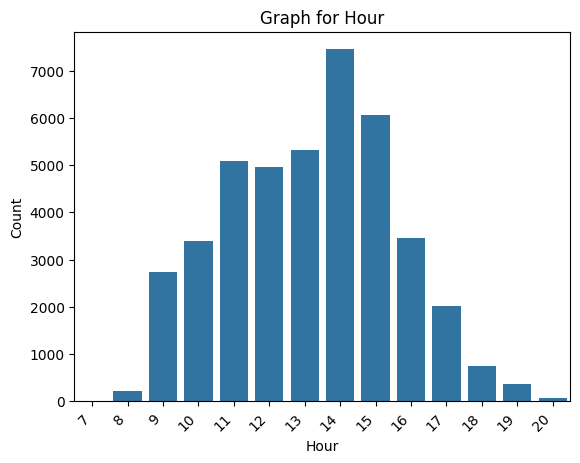

In [123]:
sns.countplot(x= df10['Hour'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Graph for Hour')
plt.show()

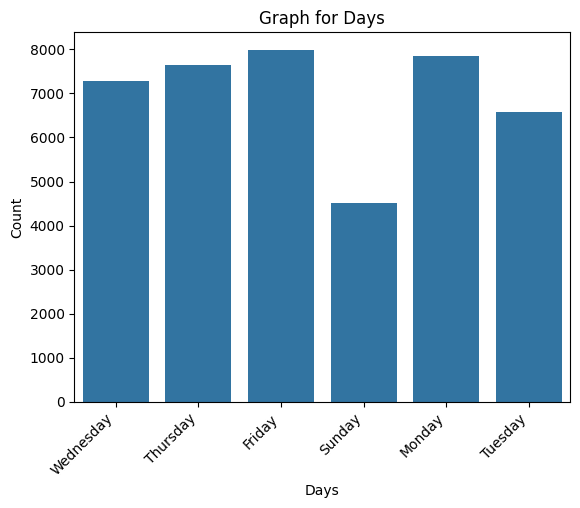

In [121]:
sns.countplot(x= df10['Day'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Graph for Days')
plt.show()

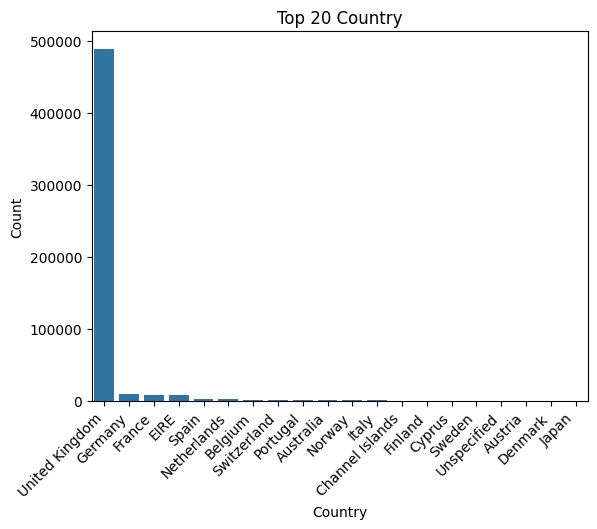

In [119]:
top =20
description = df['Country'].value_counts().nlargest(top)
sns.barplot(x=description.index, y=description.values)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 20 Country')

plt.show()

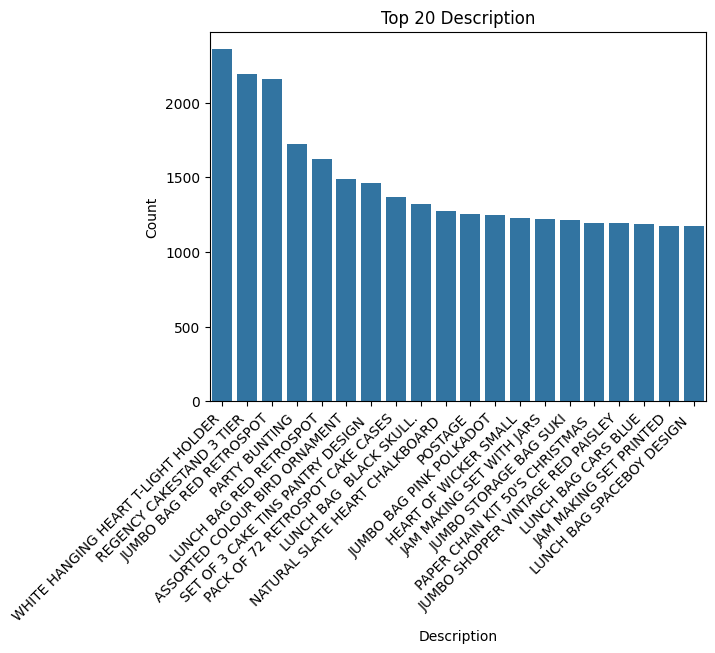

In [120]:
top =20
description = df['Description'].value_counts().nlargest(top)
sns.barplot(x=description.index, y=description.values)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Description')
plt.ylabel('Count')
plt.title('Top 20 Description')
plt.show()

In [138]:
df10['Hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20],
      dtype=int32)

In [148]:
newdf10 = df10.groupby(['Hour'])['TotalPrice'].sum().sort_values(ascending=False).reset_index()
newdf10.head(), newdf10.shape

(   Hour  TotalPrice
 0    15   122886.23
 1    14   101991.18
 2    13    84650.85
 3    12    83761.92
 4    10    83760.13,
 (14, 2))

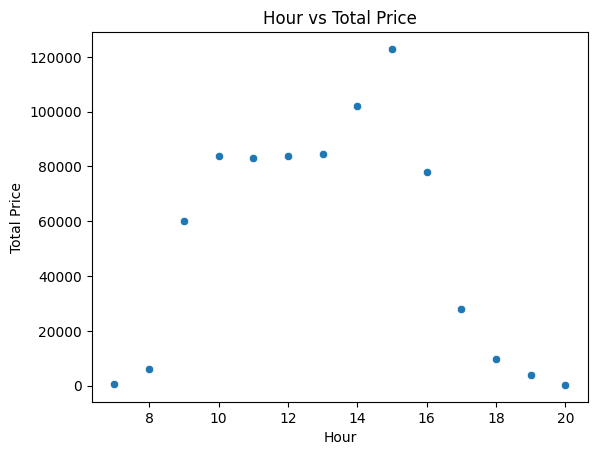

In [154]:
sns.scatterplot(x=newdf10['Hour'], y=newdf10['TotalPrice'])
plt.xlabel('Hour')
plt.ylabel('Total Price')
plt.title('Hour vs Total Price')
plt.show()

In [151]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data10 = scaler.fit_transform(newdf10)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data10)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

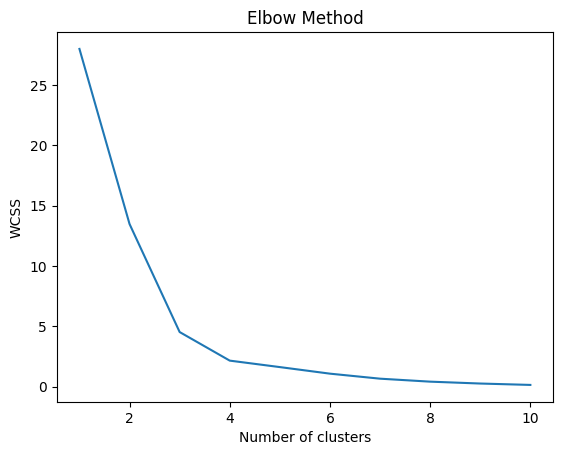

In [152]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [153]:
kmeans10 = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans10.fit(scaled_data10)
newdf10['cluster'] = kmeans10.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Analysis for 2011**

In [ ]:
df10['month'] = df['Date'].dt.month
df11.month.unique()

In [ ]:
plt.scatter(df11['month'], df11['Country'])
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.title('Month vs Total Price')

plt.show()

In [ ]:
col = (df11['month'].unique()).astype(str)
mon = []
for i in col:
  data = df11[df11['month'] == i]['TotalPrice']
  mon.append(data.mean())
sum = sum(mon)
per = mon/sum

In [ ]:
per*100

we can apply ohe on months and analyse that in which month there would be more sales

In [ ]:
plt.plot(col, per*100)
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.title('Month vs Total Price')
plt.show()
